In [1]:
import pandas as pd
pd.options.display.max_rows = 40000
pd.set_option('display.max_columns', None)
import numpy as np
import time
import os

import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("bright")

cwd = os.getcwd()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import (classification_report, 
                             plot_confusion_matrix, 
                             fbeta_score, 
                             precision_score, 
                             recall_score,
                            auc,
                            roc_curve,
                            average_precision_score,
                            roc_auc_score,
                            precision_recall_fscore_support,
                             accuracy_score,
                             precision_score, 
                             recall_score, 
                             f1_score,
                            plot_roc_curve)

from sklearn.model_selection import (train_test_split,
                                     cross_val_score, 
                                     StratifiedKFold,
                                     StratifiedShuffleSplit)

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from xgboost import XGBClassifier 

# Data preprocessing

In [2]:
# read the data
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Drop unused columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [4]:
# Column stats
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Target values
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
df[(df.diagnosis=='M')&(df.radius_mean==17.99)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
408,M,17.99,20.66,117.8,991.7,0.1036,0.1304,0.1201,0.08824,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.02509,0.01480,0.01414,0.003336,21.08,25.41,138.1,1349.0,0.1482,0.3735,0.3301,0.1974,0.3060,0.08503


In [6]:
# Check if any of the features contain null values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# Replace categorical target with boolean
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Check columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# EDA

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


Text(0.5, 1.0, 'Count of diagnosis M vs B')

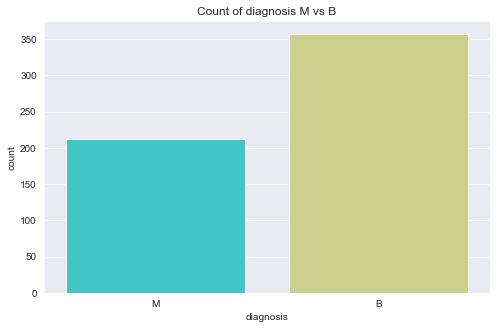

In [6]:
# Check target distributions
print(df.diagnosis.value_counts())
print(df.diagnosis.value_counts(normalize=True))
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis',data=df, palette='rainbow')
plt.title("Count of diagnosis M vs B")

In [8]:
list(df.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [9]:
type(df.columns[1])

str

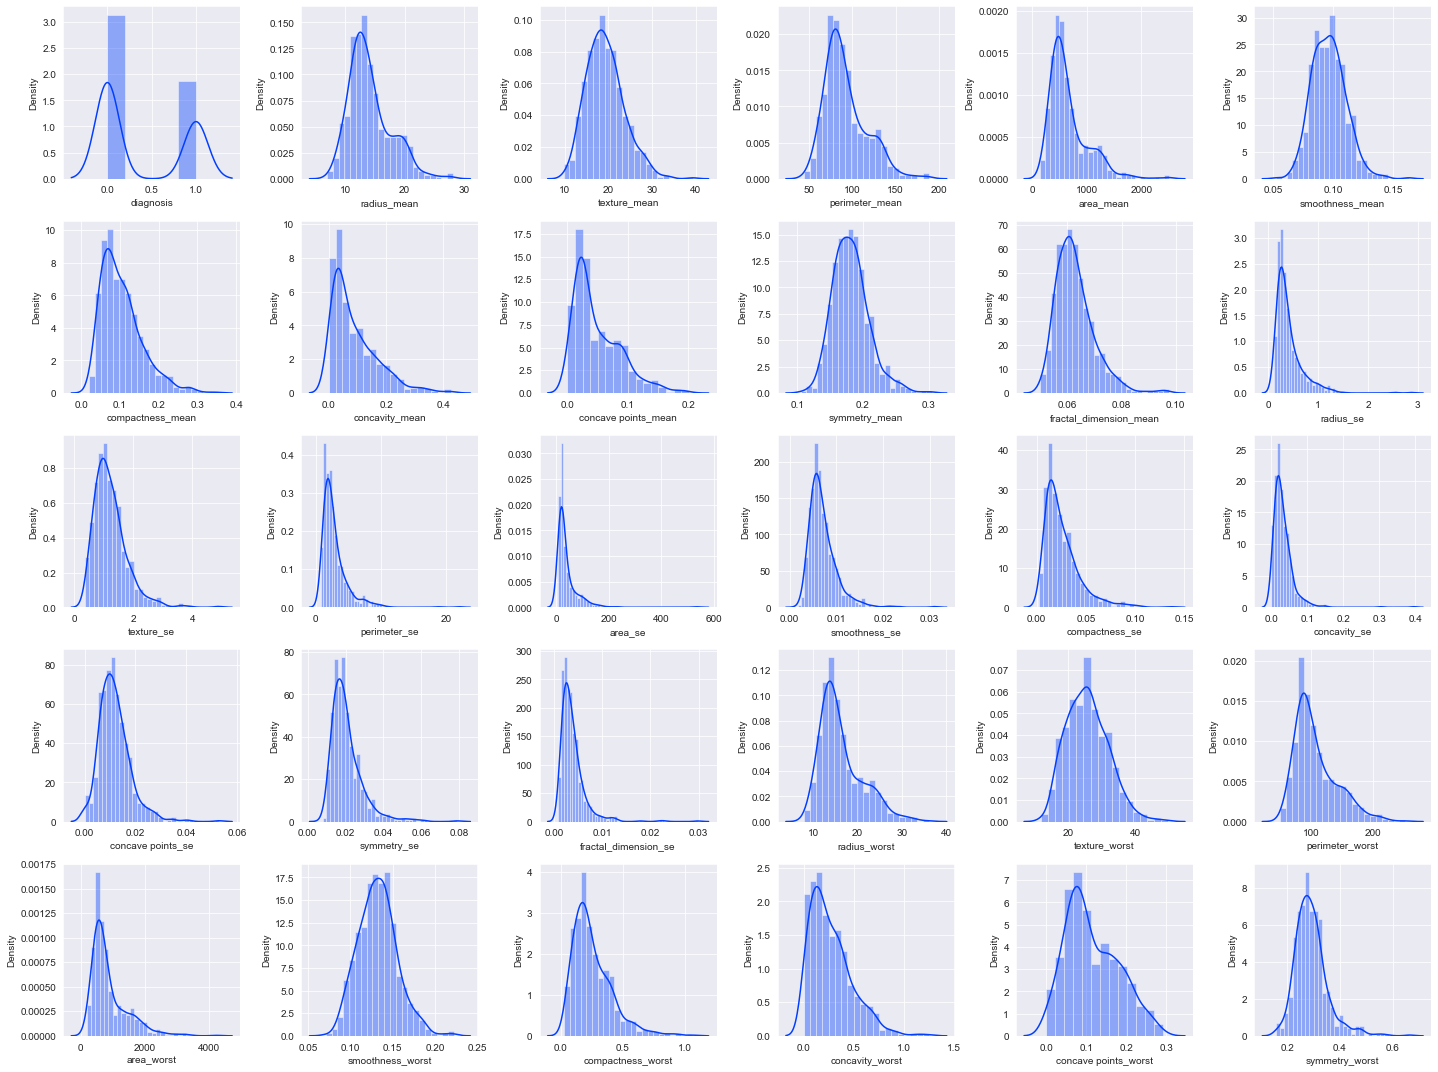

In [12]:
# Plot distribution for each feature
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [28]:
# Compare distributions of features between the two classes
def plot_distribution(df, col) :  
    #Slice the data by target
    df_malignant = df[df.diagnosis == 1][col]
    df_benign = df[df.diagnosis == 0][col]
    
    # Set histogram parameters
    hist_data = [df_malignant, df_benign]
    group_labels = ['malignant', 'benign']
    
    # Plot histogram
    fig = sns.displot(df, x=col, hue='diagnosis', kde=True, legend=False)
    
    # Set legends and titles for the plot
    plt.legend(labels=group_labels)
    plt.title(col)


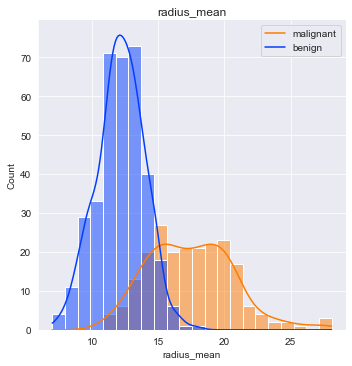

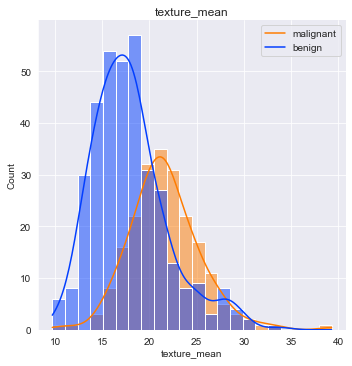

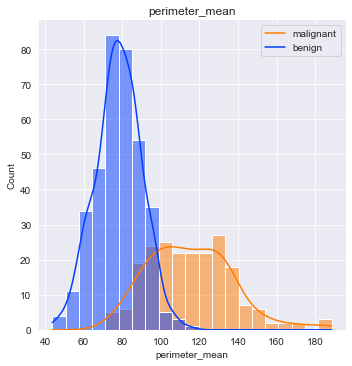

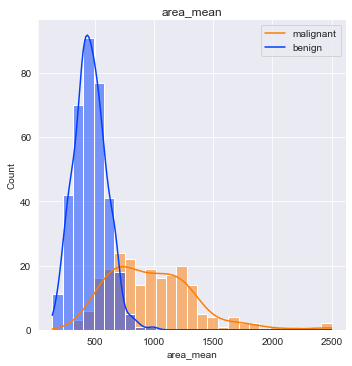

In [29]:
plot_distribution(df, 'radius_mean')
plot_distribution(df, 'texture_mean')
plot_distribution(df, 'perimeter_mean')
plot_distribution(df, 'area_mean')

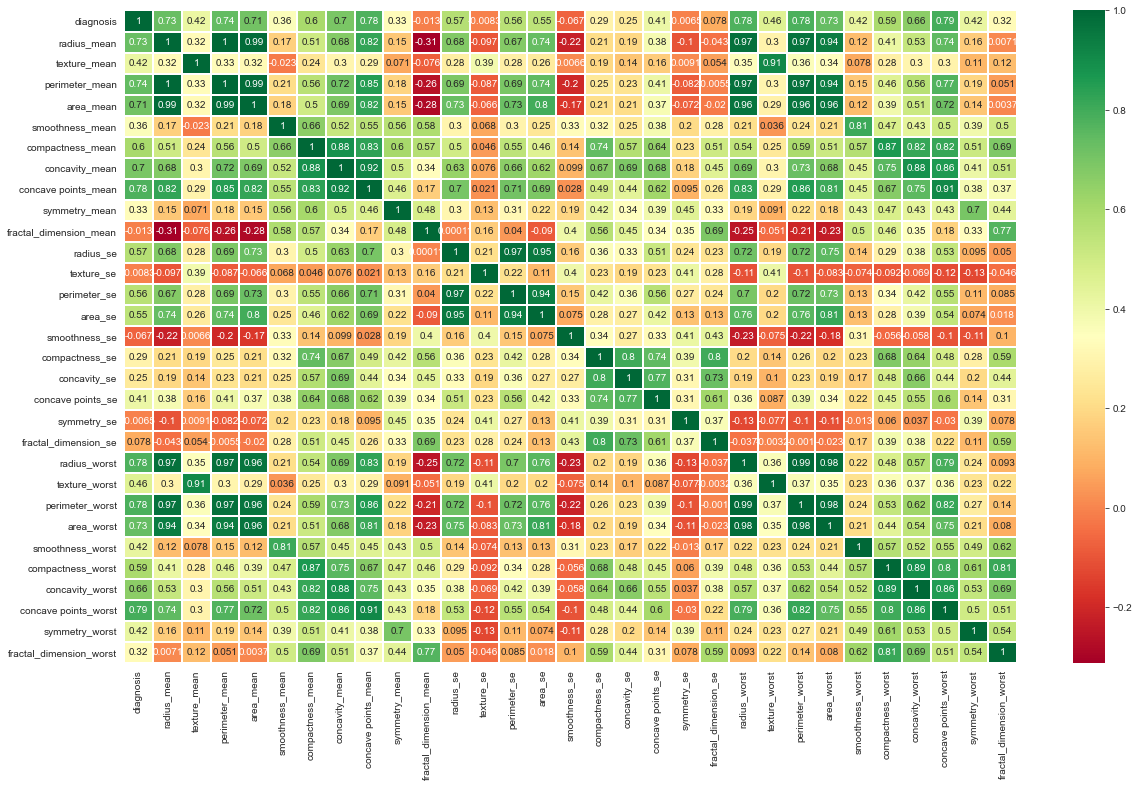

In [30]:
# Plot correlation matrix
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [5]:
corr_matrix = df.corr().abs()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [6]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,NaN,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,NaN,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


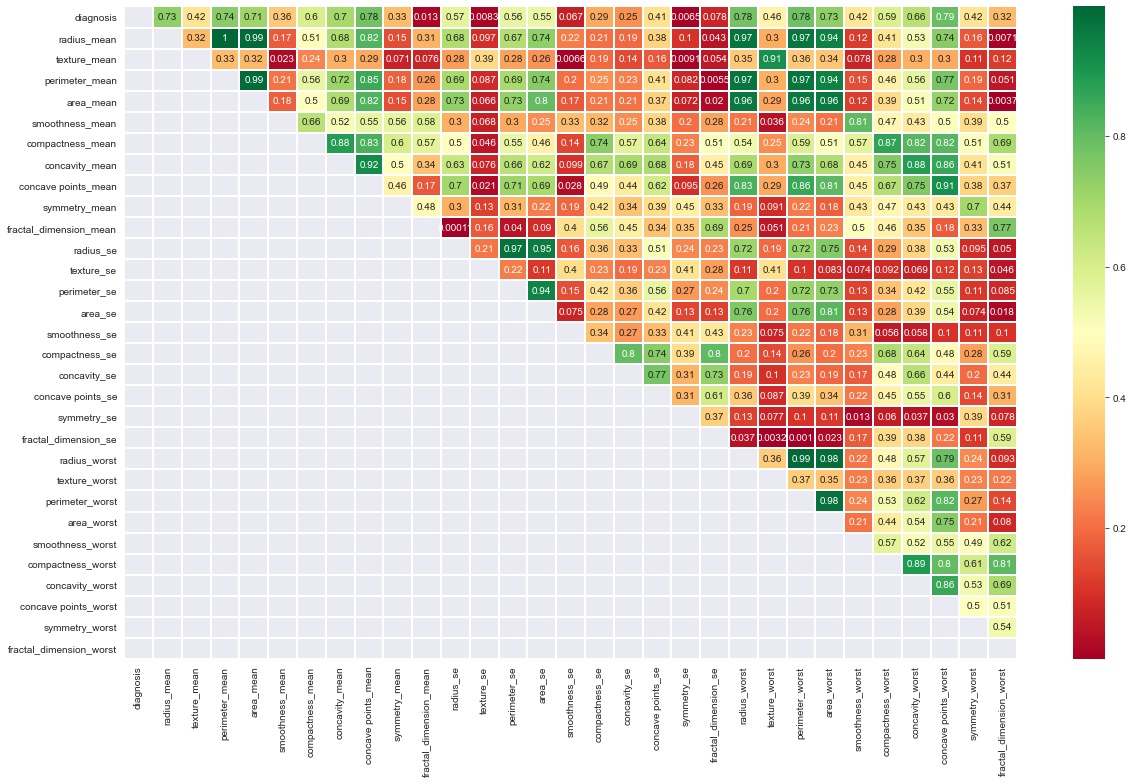

In [7]:
plt.figure(figsize = (20, 12))
sns.heatmap(upper,annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [8]:
# Get highly correlated columns
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [25]:
for col in to_drop:
    print(upper.index.values.tolist()[upper[col].argmax()])

radius_mean
radius_mean
radius_se
radius_se
radius_mean
radius_worst
radius_worst


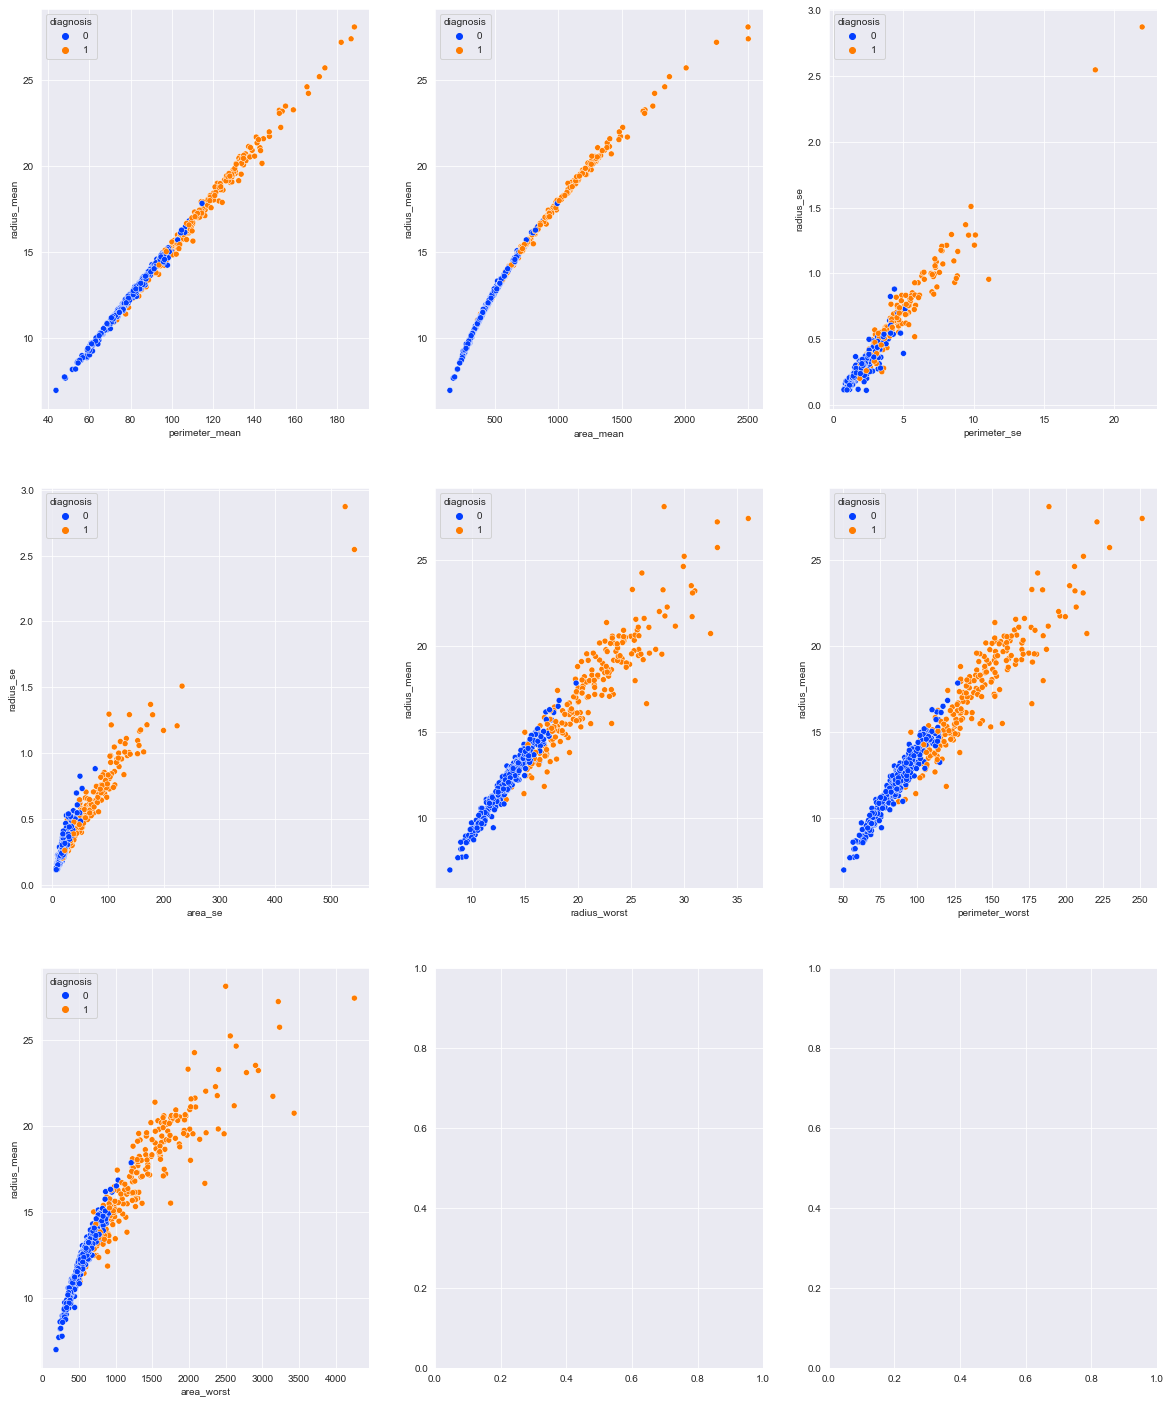

In [35]:
# Visualize some highly correlated columns
fig,ax=plt.subplots(3,3,figsize=(20,25))
sns.scatterplot(x='perimeter_mean',y='radius_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='perimeter_se',y='radius_se',data=df,hue='diagnosis',ax=ax[0][2])
sns.scatterplot(x='area_se',y='radius_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='radius_worst',y='radius_mean',data=df,hue='diagnosis',ax=ax[1][1])
sns.scatterplot(x='perimeter_worst',y='radius_mean',data=df,hue='diagnosis',ax=ax[1][2])
sns.scatterplot(x='area_worst',y='radius_mean',data=df,hue='diagnosis',ax=ax[2][0])
plt.show()

In [9]:
# Drop highly correlated columns
df = df.drop(columns=to_drop)

# Modeling

In [10]:
# Split dataset into X and y
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [11]:
# Random split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)

In [12]:
# Feature transformation (standardize and normalize)

standard_scaler = StandardScaler()

X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

minmax_scaler = MinMaxScaler()

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Logistic regression

In [49]:
# Fit model to the training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [50]:
# Make binary predictions
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1], dtype=int64)

In [52]:
# Make probability predictions
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob[:,1]

array([2.63913637e-03, 9.99779516e-01, 2.21948864e-01, 6.42922523e-01,
       6.39077420e-01, 1.33241245e-03, 3.16584696e-01, 3.15735593e-02,
       3.17307739e-03, 1.22771747e-02, 7.31275907e-01, 2.40526290e-04,
       9.99806147e-01, 2.53978823e-02, 2.41601718e-02, 6.85929230e-05,
       1.04030087e-01, 5.25138674e-03, 2.75413232e-01, 1.60900386e-03,
       1.01200964e-02, 2.17637780e-02, 9.99154102e-01, 9.79258841e-01,
       3.09206803e-01, 1.02905265e-03, 1.20192710e-03, 8.00098285e-01,
       6.98899376e-01, 9.92548709e-01, 9.92354197e-01, 2.45639684e-02,
       9.85091351e-01, 9.93883258e-01, 4.91339657e-03, 1.04255230e-01,
       1.95847255e-02, 1.21605827e-04, 7.38178104e-01, 8.81946680e-02,
       6.55474570e-04, 4.08427321e-03, 5.86113029e-01, 1.18810750e-02,
       1.55401504e-02, 4.77211260e-01, 2.05609832e-01, 8.45658682e-01,
       3.89084442e-04, 2.14162204e-03, 9.99983697e-01, 9.62515831e-01,
       4.98555927e-02, 8.80799202e-03, 3.85275870e-04, 8.34758235e-01,
      

In [56]:
# Model evaluation (AUC)
auc = roc_auc_score(y_train,log_reg.predict_proba(X_train)[:,1])
print(f'Train: {auc}')

auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'Test: {auc}')

Train: 0.9903611971104231
Test: 0.9890873015873016


In [57]:
# Model evaluation (Accuracy)
accuracy = accuracy_score(y_train, log_reg.predict(X_train))
print(f'Train: {accuracy}')

accuracy = accuracy_score(y_test, log_reg.predict(X_test))
print(f'Test: {accuracy}')

Train: 0.9626373626373627
Test: 0.9210526315789473


In [61]:
# Model evaluation (Precision, recall, f1 score)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary',zero_division=0)
print(precision)
print(recall)
print(fscore)

0.9230769230769231
0.8571428571428571
0.888888888888889


In [62]:
# Model evaluation (classification report)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [64]:
# Model evaluation (confusion matrix)
matrix = confusion_matrix(y_test, y_pred)

label_names = pd.Series(['B', 'M'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted B,Predicted M
Is B,0.958333,0.041667
Is M,0.142857,0.857143


In [65]:
# Model evaluation (confusion matrix)
matrix = confusion_matrix(y_test, y_pred)

label_names = pd.Series(['B', 'M'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted B,Predicted M
Is B,69,3
Is M,6,36


# Compare result between scaled and unscaled data

In [82]:
# Unscaled
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.9890873015873016


In [83]:
# Standard scaled
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_standard, y_train)

y_pred = log_reg.predict(X_test_standard)
y_pred_prob = log_reg.predict_proba(X_test_standard)

print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.9953703703703705


In [84]:
# Minmax scaled
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_minmax, y_train)

y_pred = log_reg.predict(X_test_minmax)
y_pred_prob = log_reg.predict_proba(X_test_minmax)

print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.9966931216931216


# Hyperparameter tuning

In [76]:
# Define hyperparameter grid
LR_parameters = {
'penalty':['l2','l1'],
'C': [ 0.1,1.0, 10.0, 100.0],
'class_weight':[None,'balanced'],
    'max_iter':[10,100,1000],
    'random_state':[42]
}

# Define logistic regression
lr = LogisticRegression()

# Define grid search CV
clf = GridSearchCV(lr, LR_parameters, cv = 3, scoring='roc_auc')

# Fit the GridSearchCV on training data
clf.fit(X_train_minmax, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'C': 100.0, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42}
0.9946829793782702


In [80]:
log_reg = LogisticRegression(**clf.best_params_)
log_reg.fit(X_train_minmax, y_train)

y_pred = log_reg.predict(X_test_minmax)
y_pred_prob = log_reg.predict_proba(X_test_minmax)

print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.9940476190476191


# Ensemble

In [92]:
# Define individual models
log_reg = LogisticRegression(**clf.best_params_)
xgb = XGBClassifier (random_state=42)
rf = RandomForestClassifier(random_state=42)

In [94]:
# Combine models
classifiers = [('Logistic Regression', log_reg), ('XGB Classifier', xgb), ('Random Forest', rf)]

# Define voting classifier
vc = VotingClassifier(estimators = classifiers, voting='soft')

vc.fit(X_train_minmax, y_train)

y_pred = vc.predict(X_test_minmax)
y_pred_prob = vc.predict_proba(X_test_minmax)

print(roc_auc_score(y_test, y_pred_prob[:,1]))

[21:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9947089947089948


In [102]:
X.shape[1]

23

# Process
1. Load data
2. Check data (check for nan, columns)
3. EDA (Exploratory Data Analysis)
    - Get full information of the data set
    - Check correlation among all features
    - Drop highly-correlated features
    - Find features that distinguish each class
4. Feature engineering (optional)
    - Create new feature
    - Transform feature (scaling, create new feature etc.)
5. Baseline model (raw model for comparison)
6. Feature selection
    - Use domain knowledge
    - Other feature selection method
7. Hyperparameter tuning (find the optimal hyperparameter combination)
8. Evaluate model
9. Try ensemble (congress)
10. Repeat from 6 - 9 until you get the best result


# Traditional
- Linear regression
- Logistic regression
- Support Vector Machine

- RandomForest
- XGBoost
- Catboost
- LightGBM

# Deep Learning

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [14]:
# Initialising the ANN
classifier = Sequential()

In [25]:
X.shape[1]

23

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(16, activation='relu', input_dim=X.shape[1]))

# # Adding dropout to prevent overfitting
# classifier.add(Dropout(rate=0.1))

In [16]:
# Adding the second hidden layer
classifier.add(Dense(6, activation='relu'))

# # Adding dropout to prevent overfitting
# classifier.add(Dropout(rate=0.1))

In [17]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [18]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [19]:
# Fitting the ANN to the Training set
classifier.fit(X_train_minmax, y_train, batch_size=100, validation_data=(X_test_minmax, y_test), epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 48ms/step - loss: 0.6994 - auc: 0.7645 - val_loss: 0.6989 - val_auc: 0.7583
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6873 - auc: 0.7905 - val_loss: 0.6868 - val_auc: 0.7895
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6782 - auc: 0.8198 - val_loss: 0.6783 - val_auc: 0.8257
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6722 - auc: 0.8488 - val_loss: 0.6724 - val_auc: 0.8591
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6670 - auc: 0.8677 - val_loss: 0.6672 - val_auc: 0.8778
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6621 - auc: 0.8806 - val_loss: 0.6620 - val_auc: 0.8983
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6573 - auc: 0.8943 - val_loss: 0.6569 - val_auc: 0.9062
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6523 - auc: 0.9051 - va

5/5 [==============================] - 0s 5ms/step - loss: 0.4149 - auc: 0.9874 - val_loss: 0.4173 - val_auc: 0.9983
Epoch 64/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4125 - auc: 0.9857 - val_loss: 0.4151 - val_auc: 0.9983
Epoch 65/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4098 - auc: 0.9875 - val_loss: 0.4124 - val_auc: 0.9985
Epoch 66/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4074 - auc: 0.9875 - val_loss: 0.4103 - val_auc: 0.9983
Epoch 67/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4053 - auc: 0.9852 - val_loss: 0.4095 - val_auc: 0.9980
Epoch 68/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4028 - auc: 0.9880 - val_loss: 0.4060 - val_auc: 0.9982
Epoch 69/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4004 - auc: 0.9877 - val_loss: 0.4034 - val_auc: 0.9985
Epoch 70/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3981 - auc: 0.9878 - val_loss

5/5 [==============================] - 0s 5ms/step - loss: 0.3092 - auc: 0.9868 - val_loss: 0.3190 - val_auc: 0.9982
Epoch 126/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3074 - auc: 0.9896 - val_loss: 0.3148 - val_auc: 0.9983
Epoch 127/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3058 - auc: 0.9896 - val_loss: 0.3133 - val_auc: 0.9983
Epoch 128/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3046 - auc: 0.9923 - val_loss: 0.3131 - val_auc: 0.9983
Epoch 129/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3034 - auc: 0.9896 - val_loss: 0.3126 - val_auc: 0.9983
Epoch 130/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3023 - auc: 0.9897 - val_loss: 0.3114 - val_auc: 0.9983
Epoch 131/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3012 - auc: 0.9897 - val_loss: 0.3091 - val_auc: 0.9983
Epoch 132/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2999 - auc: 0.9897 - v

5/5 [==============================] - 0s 5ms/step - loss: 0.2457 - auc: 0.9901 - val_loss: 0.2596 - val_auc: 0.9871
Epoch 188/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2447 - auc: 0.9902 - val_loss: 0.2568 - val_auc: 0.9871
Epoch 189/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2439 - auc: 0.9901 - val_loss: 0.2549 - val_auc: 0.9868
Epoch 190/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2432 - auc: 0.9900 - val_loss: 0.2553 - val_auc: 0.9869
Epoch 191/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2422 - auc: 0.9901 - val_loss: 0.2558 - val_auc: 0.9871
Epoch 192/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2415 - auc: 0.9902 - val_loss: 0.2564 - val_auc: 0.9871
Epoch 193/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2407 - auc: 0.9902 - val_loss: 0.2545 - val_auc: 0.9871
Epoch 194/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2399 - auc: 0.9902 - v

In [20]:
y_pred_prob = classifier.predict(X_test_minmax)

y_pred_prob

array([[0.27472803],
       [0.9999956 ],
       [0.27472803],
       [0.42436668],
       [0.31583053],
       [0.27472803],
       [0.9185615 ],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.96087396],
       [0.27472803],
       [0.9999746 ],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.5272842 ],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.9998735 ],
       [0.9967984 ],
       [0.7231747 ],
       [0.27472803],
       [0.27472803],
       [0.92392004],
       [0.9887097 ],
       [0.99155354],
       [0.9990078 ],
       [0.27472803],
       [0.9993222 ],
       [0.9988104 ],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.9959936 ],
       [0.27472803],
       [0.27472803],
       [0.27472803],
       [0.85194695],
       [0.27472803],
       [0.27472803],
       [0.5527823 ],
       [0.27472803],
       [0.942

In [21]:
print(roc_auc_score(y_test, y_pred_prob))

0.9871031746031746


In [23]:
y_pred_class = (y_pred_prob>0.5)
y_pred_class

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [24]:
# Model evaluation (confusion matrix)
matrix = confusion_matrix(y_test, y_pred_class)

label_names = pd.Series(['B', 'M'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted B,Predicted M
Is B,71,1
Is M,2,40


# DL with early stopping

In [172]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16, activation='relu', kernel_initializer='glorot_uniform', input_dim=X.shape[1]))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(6, activation='relu'))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Fitting the ANN to the Training set
classifier.fit(X_train_minmax, y_train, batch_size=100, validation_data=(X_test_minmax, y_test), epochs=200, callbacks=[es])

Epoch 1/200
5/5 [==============================] - 1s 40ms/step - loss: 0.7792 - auc: 0.6388 - val_loss: 0.7638 - val_auc: 0.6799
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7548 - auc: 0.6280 - val_loss: 0.7468 - val_auc: 0.6809
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7397 - auc: 0.6118 - val_loss: 0.7318 - val_auc: 0.6809
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7264 - auc: 0.6143 - val_loss: 0.7186 - val_auc: 0.6870
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7093 - auc: 0.6465 - val_loss: 0.7070 - val_auc: 0.6958
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6977 - auc: 0.6646 - val_loss: 0.6976 - val_auc: 0.7105
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6893 - auc: 0.6898 - val_loss: 0.6900 - val_auc: 0.7295
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6823 - auc: 0.7122 - va

5/5 [==============================] - 0s 5ms/step - loss: 0.2698 - auc: 0.9634 - val_loss: 0.2167 - val_auc: 0.9980
Epoch 65/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2795 - auc: 0.9646 - val_loss: 0.2133 - val_auc: 0.9980
Epoch 66/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2671 - auc: 0.9646 - val_loss: 0.2107 - val_auc: 0.9987
Epoch 67/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2710 - auc: 0.9615 - val_loss: 0.2081 - val_auc: 0.9982
Epoch 68/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2557 - auc: 0.9672 - val_loss: 0.2041 - val_auc: 0.9985
Epoch 69/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2555 - auc: 0.9651 - val_loss: 0.2018 - val_auc: 0.9983
Epoch 70/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2525 - auc: 0.9694 - val_loss: 0.1979 - val_auc: 0.9985
Epoch 71/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2394 - auc: 0.9707 - val_loss

In [173]:
y_pred_prob = classifier.predict(X_test_minmax)

y_pred_class = (y_pred>0.5)

print(roc_auc_score(y_test, y_pred_prob))

0.9976851851851851


In [174]:
# Model evaluation (confusion matrix)
matrix = confusion_matrix(y_test, y_pred_class)

label_names = pd.Series(['B', 'M'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted B,Predicted M
Is B,72,0
Is M,4,38
